# 0) imports

In [1]:
from sklearn import datasets

# 1) loader les data

In [2]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print("\n".join(boston.DESCR.split("\n")[:15]))

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town


# 1.1) on récupére x et y 

In [4]:
X = boston.data
y = boston.target

## 1.2) on divise en jeu de test et d'apprentissage

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y )

In [7]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((379, 13), (127, 13), (379,), (127,))

# 2) Modélisation

## 2.1) arbre de décision simple 

In [8]:
performances = {}

In [9]:
from sklearn.tree import DecisionTreeRegressor

algorithme = DecisionTreeRegressor()
modele     = algorithme.fit(X_train, Y_train)
score      = modele.score(X_test, Y_test)
score
performances[algorithme] = score

## 2.2) création d'une fonction pour tester les algos

In [10]:
def get_score(algorithme, X_train, X_test, Y_train, Y_test):
    modele     = algorithme.fit(X_train, Y_train)
    score      = modele.score(X_test, Y_test)
    return score

## 2.3) tester plusieurs algos

In [11]:
algorithme = DecisionTreeRegressor(random_state=1)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
score
performances[algorithme] = score

### 2.3.1) Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor
hyperparametres = {"n_estimators" : 30}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
performances[algorithme] = score

In [13]:
from sklearn.ensemble import RandomForestRegressor
hyperparametres = {"n_estimators" : 30, 
                  "max_features"  :  3,
                  "max_depth"     :  50,}
algorithme = RandomForestRegressor(**hyperparametres)
score = get_score(algorithme, X_train, X_test, Y_train, Y_test)
performances[algorithme] = score

### 2.3.2) ExtraTreesRegressor

In [14]:
from sklearn.ensemble import ExtraTreesRegressor

algorithme = ExtraTreesRegressor()
score      = get_score(algorithme, X_train, X_test, Y_train, Y_test)
performances[algorithme] = score

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 2.3.3) catboost
installation : 
!pip install catboost 

In [16]:
from catboost import CatBoostRegressor

In [17]:
algorithme = CatBoostRegressor(task_type="CPU")
modele     = algorithme.fit(X_train,Y_train)
score      = modele.score(X_test, Y_test)
score

0:	learn: 9.1085824	total: 66.2ms	remaining: 1m 6s
1:	learn: 8.9677534	total: 71.3ms	remaining: 35.6s
2:	learn: 8.7991006	total: 77ms	remaining: 25.6s
3:	learn: 8.6636201	total: 82.4ms	remaining: 20.5s
4:	learn: 8.5300206	total: 88.4ms	remaining: 17.6s
5:	learn: 8.3725787	total: 93.9ms	remaining: 15.6s
6:	learn: 8.2126112	total: 99.1ms	remaining: 14.1s
7:	learn: 8.0911903	total: 106ms	remaining: 13.1s
8:	learn: 7.9630083	total: 111ms	remaining: 12.2s
9:	learn: 7.8199497	total: 116ms	remaining: 11.5s
10:	learn: 7.6939513	total: 122ms	remaining: 11s
11:	learn: 7.5675543	total: 128ms	remaining: 10.5s
12:	learn: 7.4550915	total: 133ms	remaining: 10.1s
13:	learn: 7.3372074	total: 138ms	remaining: 9.74s
14:	learn: 7.2141507	total: 143ms	remaining: 9.4s
15:	learn: 7.1100395	total: 149ms	remaining: 9.15s
16:	learn: 7.0286937	total: 154ms	remaining: 8.92s
17:	learn: 6.9694673	total: 159ms	remaining: 8.7s
18:	learn: 6.9019124	total: 165ms	remaining: 8.5s
19:	learn: 6.7979241	total: 170ms	remaini

166:	learn: 2.5240253	total: 1.04s	remaining: 5.2s
167:	learn: 2.5157919	total: 1.05s	remaining: 5.19s
168:	learn: 2.5084750	total: 1.06s	remaining: 5.19s
169:	learn: 2.5030782	total: 1.06s	remaining: 5.19s
170:	learn: 2.4966784	total: 1.07s	remaining: 5.19s
171:	learn: 2.4874357	total: 1.07s	remaining: 5.18s
172:	learn: 2.4786908	total: 1.08s	remaining: 5.17s
173:	learn: 2.4712108	total: 1.09s	remaining: 5.16s
174:	learn: 2.4632384	total: 1.09s	remaining: 5.15s
175:	learn: 2.4560296	total: 1.1s	remaining: 5.14s
176:	learn: 2.4493900	total: 1.1s	remaining: 5.13s
177:	learn: 2.4419642	total: 1.11s	remaining: 5.12s
178:	learn: 2.4346643	total: 1.12s	remaining: 5.12s
179:	learn: 2.4271968	total: 1.12s	remaining: 5.11s
180:	learn: 2.4193538	total: 1.13s	remaining: 5.1s
181:	learn: 2.4138381	total: 1.13s	remaining: 5.09s
182:	learn: 2.4085106	total: 1.14s	remaining: 5.08s
183:	learn: 2.4009798	total: 1.14s	remaining: 5.07s
184:	learn: 2.3960471	total: 1.15s	remaining: 5.06s
185:	learn: 2.38

339:	learn: 1.8350622	total: 2.03s	remaining: 3.95s
340:	learn: 1.8324215	total: 2.04s	remaining: 3.94s
341:	learn: 1.8313807	total: 2.05s	remaining: 3.94s
342:	learn: 1.8294242	total: 2.06s	remaining: 3.94s
343:	learn: 1.8276519	total: 2.06s	remaining: 3.93s
344:	learn: 1.8251722	total: 2.07s	remaining: 3.92s
345:	learn: 1.8215537	total: 2.07s	remaining: 3.92s
346:	learn: 1.8191255	total: 2.08s	remaining: 3.91s
347:	learn: 1.8172225	total: 2.08s	remaining: 3.9s
348:	learn: 1.8157199	total: 2.09s	remaining: 3.9s
349:	learn: 1.8138520	total: 2.1s	remaining: 3.89s
350:	learn: 1.8101268	total: 2.1s	remaining: 3.88s
351:	learn: 1.8083831	total: 2.11s	remaining: 3.88s
352:	learn: 1.8050087	total: 2.11s	remaining: 3.87s
353:	learn: 1.8040842	total: 2.12s	remaining: 3.87s
354:	learn: 1.8031534	total: 2.13s	remaining: 3.86s
355:	learn: 1.8015852	total: 2.13s	remaining: 3.86s
356:	learn: 1.7987493	total: 2.14s	remaining: 3.85s
357:	learn: 1.7966231	total: 2.14s	remaining: 3.84s
358:	learn: 1.79

526:	learn: 1.5524292	total: 3.22s	remaining: 2.89s
527:	learn: 1.5515541	total: 3.23s	remaining: 2.89s
528:	learn: 1.5505501	total: 3.24s	remaining: 2.88s
529:	learn: 1.5491280	total: 3.24s	remaining: 2.88s
530:	learn: 1.5481974	total: 3.25s	remaining: 2.87s
531:	learn: 1.5473512	total: 3.25s	remaining: 2.86s
532:	learn: 1.5462328	total: 3.26s	remaining: 2.86s
533:	learn: 1.5444982	total: 3.27s	remaining: 2.85s
534:	learn: 1.5438466	total: 3.27s	remaining: 2.84s
535:	learn: 1.5431009	total: 3.28s	remaining: 2.84s
536:	learn: 1.5414543	total: 3.29s	remaining: 2.83s
537:	learn: 1.5403078	total: 3.29s	remaining: 2.83s
538:	learn: 1.5396747	total: 3.3s	remaining: 2.82s
539:	learn: 1.5386090	total: 3.3s	remaining: 2.81s
540:	learn: 1.5366200	total: 3.31s	remaining: 2.81s
541:	learn: 1.5353235	total: 3.31s	remaining: 2.8s
542:	learn: 1.5338315	total: 3.32s	remaining: 2.79s
543:	learn: 1.5328072	total: 3.32s	remaining: 2.79s
544:	learn: 1.5321100	total: 3.33s	remaining: 2.78s
545:	learn: 1.5

714:	learn: 1.3738704	total: 4.41s	remaining: 1.76s
715:	learn: 1.3731676	total: 4.42s	remaining: 1.75s
716:	learn: 1.3720530	total: 4.42s	remaining: 1.75s
717:	learn: 1.3707626	total: 4.43s	remaining: 1.74s
718:	learn: 1.3687187	total: 4.43s	remaining: 1.73s
719:	learn: 1.3674111	total: 4.44s	remaining: 1.73s
720:	learn: 1.3668411	total: 4.45s	remaining: 1.72s
721:	learn: 1.3663827	total: 4.45s	remaining: 1.71s
722:	learn: 1.3661321	total: 4.46s	remaining: 1.71s
723:	learn: 1.3652511	total: 4.46s	remaining: 1.7s
724:	learn: 1.3647584	total: 4.47s	remaining: 1.69s
725:	learn: 1.3636765	total: 4.47s	remaining: 1.69s
726:	learn: 1.3630218	total: 4.48s	remaining: 1.68s
727:	learn: 1.3623304	total: 4.48s	remaining: 1.68s
728:	learn: 1.3611911	total: 4.49s	remaining: 1.67s
729:	learn: 1.3601594	total: 4.5s	remaining: 1.66s
730:	learn: 1.3598589	total: 4.5s	remaining: 1.66s
731:	learn: 1.3595341	total: 4.51s	remaining: 1.65s
732:	learn: 1.3582676	total: 4.51s	remaining: 1.64s
733:	learn: 1.3

901:	learn: 1.2327738	total: 5.6s	remaining: 608ms
902:	learn: 1.2319324	total: 5.61s	remaining: 602ms
903:	learn: 1.2313551	total: 5.62s	remaining: 596ms
904:	learn: 1.2310410	total: 5.63s	remaining: 590ms
905:	learn: 1.2308397	total: 5.63s	remaining: 584ms
906:	learn: 1.2304230	total: 5.64s	remaining: 578ms
907:	learn: 1.2299747	total: 5.64s	remaining: 572ms
908:	learn: 1.2293172	total: 5.65s	remaining: 566ms
909:	learn: 1.2284152	total: 5.66s	remaining: 560ms
910:	learn: 1.2280978	total: 5.67s	remaining: 553ms
911:	learn: 1.2277241	total: 5.67s	remaining: 547ms
912:	learn: 1.2269738	total: 5.68s	remaining: 541ms
913:	learn: 1.2261908	total: 5.68s	remaining: 535ms
914:	learn: 1.2257116	total: 5.69s	remaining: 529ms
915:	learn: 1.2256076	total: 5.7s	remaining: 522ms
916:	learn: 1.2250770	total: 5.7s	remaining: 516ms
917:	learn: 1.2245430	total: 5.71s	remaining: 510ms
918:	learn: 1.2241351	total: 5.72s	remaining: 504ms
919:	learn: 1.2237139	total: 5.72s	remaining: 498ms
920:	learn: 1.2

0.8346729693189161

In [18]:
performances['catboost'] =score

In [15]:
import pandas as pd

# Attention : l'ordre de retour des valeurs d'un dictionnaire n'est pas garanti => c'est potentiellement aléatoire

In [38]:
df = pd.DataFrame()
df["perf"] = performances.values()
df["algo"] = performances.keys()


## => on remplace le dico aléatoire par un dico ordonnée via la librairie "collections" qui propose la classe OrderedDict

In [55]:
from collections import OrderedDict

In [57]:
dico_ordonne = OrderedDict(performances)

In [58]:
df = pd.DataFrame()
df["perf"] = dico_ordonne.values()
df["algo"] = dico_ordonne.keys()


In [59]:
df["nom_algo"] = df.algo.map(lambda algo: str(algo).split("(")[0])

In [60]:
df

,perf,algo,nom_algo
0,0.690126,"DecisionTreeRegressor(criterion='mse', max_dep...",DecisionTreeRegressor
1,0.699910,"DecisionTreeRegressor(criterion='mse', max_dep...",DecisionTreeRegressor
2,0.828475,"(DecisionTreeRegressor(criterion='mse', max_de...",RandomForestRegressor
3,0.778400,"(DecisionTreeRegressor(criterion='mse', max_de...",RandomForestRegressor
4,0.747973,"(ExtraTreeRegressor(criterion='mse', max_depth...",ExtraTreesRegressor
5,0.834673,catboost,catboost


In [61]:
df.set_index("nom_algo", inplace=True)

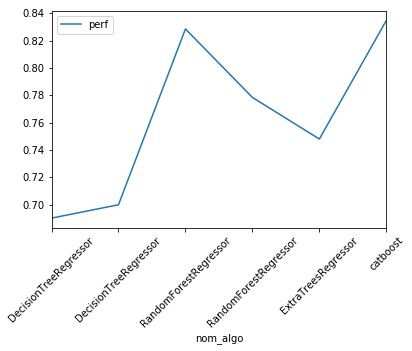

In [62]:
%matplotlib inline
df[["perf"]].plot(rot=45)

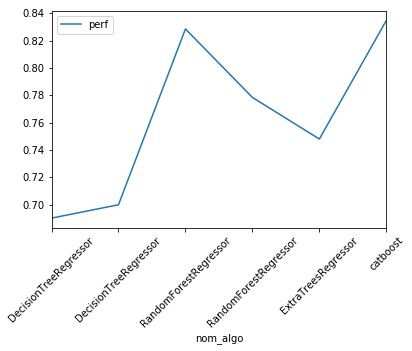

In [50]:
%matplotlib inline
df[["perf"]].plot(rot=45)

## 2.1.1) tester la stabilité du score

In [89]:
r = []
for i in range(100):
    score = get_score(DecisionTreeRegressor(random_state=1), X_train, X_test, Y_train, Y_test )
    r.append(score)

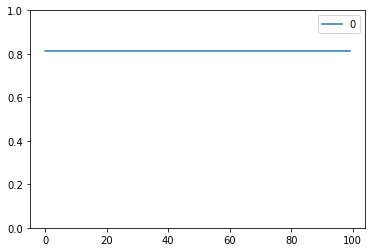

In [90]:
%matplotlib inline
import pandas as pd
_ = pd.DataFrame(r)
_.plot(ylim=[0,1])

## 2.2) Extra tree regressor

# 3) Changer de type de problème => passer d'une régression à une classification en regroupant les valeurs dans des classes de valeur (binning)


In [63]:
from sklearn.preprocessing import KBinsDiscretizer
n_bins = 5
algorithme = KBinsDiscretizer(n_bins=n_bins)
bins = algorithme.fit_transform([y])

## 3.1) On peut utiliser 'cut' de pandas, pour créer les categories

In [92]:
y_en_categories = pd.cut(y, 5)
y_en_categories = y_en_categories.__dict__['_codes']

## 3.2) on refait le test et le split

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y_en_categories)

## 3.3) on prend un algo de classification

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
algorithme = RandomForestClassifier()

In [102]:
modele = algorithme.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [104]:
modele.predict(X_test)

array([1, 2, 1, 0, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1,
       1, 2, 0, 2, 3, 0, 3, 1, 3, 0, 1, 2, 4, 0, 4, 1, 4, 1, 1, 1, 0, 1,
       3, 4, 2, 0, 1, 2, 3, 4, 1, 2, 1, 2, 4, 1, 1, 1, 0, 0, 1, 1, 0, 2,
       4, 1, 1, 1, 4, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 0, 1, 3, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 2, 1, 1, 4, 2, 1, 1, 1, 2, 1, 1, 1], dtype=int8)

In [106]:
algorithme.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state')

In [108]:
algorithme.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [103]:
perf = modele.score(X_test, Y_test)
perf

0.7559055118110236